<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 4*

# 📝 Assignment
---

# Interpreting ML Model

## 0. 환경설정
- 분석에 적합한 환경으로 설정합니다.
- 패키지, 라이브러리 등을 설치하고, 데이터셋을 불러옵니다.

In [3]:
# 0. 환경설정
"""
■ 목표1: 패키지 설치하기

■ 목표2: 라이브러리 불러오기

■ 목표3: 데이터셋 불러오기

■ 목표4: 데이터셋 추가하기

"""
# 0-1. 패키지 설치하기
## 원핫인코딩
! pip install --upgrade category_encoders

## sklearn
!pip install -U scikit-learn
!pip install --upgrade scikit-image

## 프로파일링
!pip install -U pandas-profiling

## permutation
!pip install eli5

## catboost
!pip install catboost

## PDP
!conda install -c conda-forge shap
!pip install pdpbox

## SHAP
!conda install -c conda-forge shap
!pip install shap


# 0-2. 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
import skimage

# 0-3. 데이터셋 불러오기
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Invistico_Airline.csv')


     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 22.3MB 1.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
     |████████████████████████████████| 29.2MB 161kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.16.2
    Uninstalling scikit-image-0.16.2:
      Successfully uninstalled scikit-image-0.16.2
     |████████████████████████████████| 245kB 4.3MB/s 
     |████████████████████████████████| 604kB 15.8MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 3.1MB 18.6MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 81kB 10.3MB/s 
     |████████████████████████████████| 296kB 44.0MB/s 
  Created wheel for phik: filen

### 0-4. 데이터셋 추가하기
- 모델의 예측력 제고를 위해 추가 데이터를 생성합니다.
- 추가된 데이터셋과 기존 데이터셋을 합칩니다.

In [4]:
# 0-4. 데이터셋 추가하기

# 0-4-1. 추가 데이터 생성
df_lengthen = pd.DataFrame( {'satisfaction' : np.random.randint(2, size=(200000-len(df)))+1 ,
                             'Gender': np.random.randint(2, size=(200000-len(df)))+1 ,
                             'Customer Type': np.random.randint(2, size=(200000-len(df)))+1 ,
                             'Age': np.random.randint(df['Age'].min(), df['Age'].max(), size=(200000-len(df))) ,
                             'Type of Travel': np.random.randint(2, size=(200000-len(df)))+1 ,
                             'Class': np.random.randint(3, size=(200000-len(df)))+1,
                             'Flight Distance': np.random.randint(df['Flight Distance'].min(), df['Flight Distance'].max(), size=(200000-len(df))),
                             'Seat comfort': np.random.randint(df['Seat comfort'].min(), df['Seat comfort'].max(), size=(200000-len(df))),
                             'Departure/Arrival time convenient': np.random.randint(df['Departure/Arrival time convenient'].min(), df['Departure/Arrival time convenient'].max(), size=(200000-len(df))),
                             'Food and drink': np.random.randint(df['Food and drink'].min(), df['Food and drink'].max(), size=(200000-len(df))),
                             'Gate location': np.random.randint(df['Gate location'].min(), df['Gate location'].max(), size=(200000-len(df))),
                             'Inflight wifi service': np.random.randint(df['Inflight wifi service'].min(), df['Inflight wifi service'].max(), size=(200000-len(df))),
                             'Inflight entertainment': np.random.randint(df['Inflight entertainment'].min(), df['Inflight entertainment'].max(), size=(200000-len(df))),
                             'Online support': np.random.randint(df['Online support'].min(), df['Online support'].max(), size=(200000-len(df))),
                             'Ease of Online booking': np.random.randint(df['Ease of Online booking'].min(), df['Ease of Online booking'].max(), size=(200000-len(df))),
                             'On-board service': np.random.randint(df['On-board service'].min(), df['On-board service'].max(), size=(200000-len(df))),
                             'Leg room service': np.random.randint(df['Leg room service'].min(), df['Leg room service'].max(), size=(200000-len(df))),
                             'Baggage handling': np.random.randint(df['Baggage handling'].min(), df['Baggage handling'].max(), size=(200000-len(df))),
                             'Checkin service': np.random.randint(df['Checkin service'].min(), df['Checkin service'].max(), size=(200000-len(df))),
                             'Cleanliness': np.random.randint(df['Cleanliness'].min(), df['Cleanliness'].max(), size=(200000-len(df))),
                             'Online boarding': np.random.randint(df['Online boarding'].min(), df['Online boarding'].max(), size=(200000-len(df))),
                             'Departure Delay in Minutes': np.random.randint(df['Departure Delay in Minutes'].min(), df['Departure Delay in Minutes'].mean() + (38 * 3), size=(200000-len(df))), # std: 38.071, 시그마 3구간까지 커버
                             'Arrival Delay in Minutes': np.random.randint(df['Arrival Delay in Minutes'].min(), df['Arrival Delay in Minutes'].mean() + (38 * 3), size=(200000-len(df)))   # std: 38.466, 시그마 3구간까지 커버                        
                             })


df_lengthen['satisfaction'] = np.where(df_lengthen['satisfaction'] == 1, 'satisfied', 'dissatisfied')
df_lengthen['Gender'] = np.where(df_lengthen['Gender'] == 1, 'Female', 'Male')
df_lengthen['Customer Type'] = np.where(df_lengthen['Customer Type'] == 1, 'Loyal Customer', 'disloyal Customer')
df_lengthen['Type of Travel'] = np.where(df_lengthen['Type of Travel'] == 1, 'Personal Travel', 'Business travel')
df_lengthen['Class'] = np.where(df_lengthen['Class'] == 1, 'Eco', 
                       np.where(df_lengthen['Class'] == 2, 'Business', 
                       np.where(df_lengthen['Class'] == 3, 'Eco Plus', df_lengthen['Class'])))


# 0-4-2. 데이터셋 합치기
df_merged = pd.concat([df, df_lengthen], axis = 0)

### 데이터셋 추가하기 결과
- (결과) 총 설문량을 12만여 건에서 20만 건으로 증가시켰습니다.
- (사유) 정확도(0.9 초과)가 너무 높아 데이터 유출이 발생한 것으로 의심이 되었습니다. 무작위적인 설문조사를 추가함으로서 정확도를 낮추고 데이터 유출 가능성을 감소시키고자 하였습니다.

## 1. EDA1
- 불러온 데이터셋을 간단하게 살펴봅니다.
- 특성, 모양, 관계, 분포 등을 확인합니다.

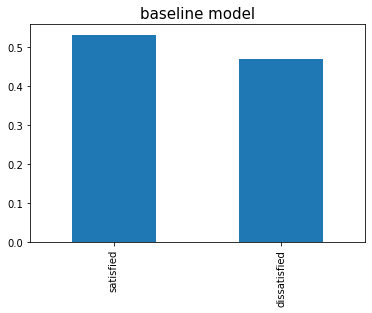

satisfied       0.531395
dissatisfied    0.468605
Name: satisfaction, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


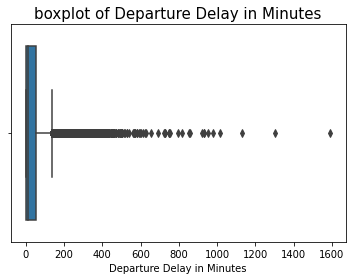

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


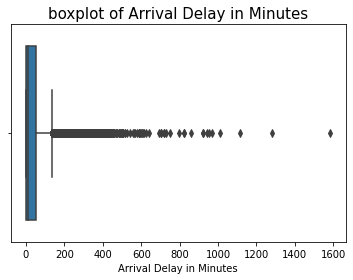

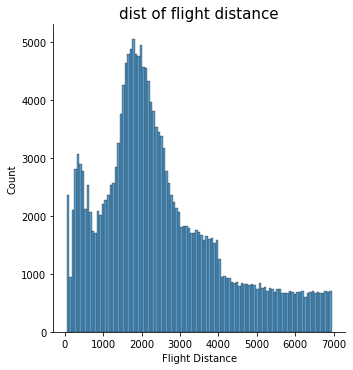

In [5]:
# 1. EDA1
"""
■ 목표1: 데이터 모양 살펴보기

■ 목표2: 데이터 결측치 살펴보기

■ 목표3: 데이터 특성 살펴보기

■ 목표4: 기준모델 확인

■ 목표5: 분포 확인

"""

# 1-1. 데이터 모양 살펴보기
"""
■ 데이터 모양: 200000 rows × 23 columns
"""
df_merged.shape

# 1-2. 데이터 결측치 살펴보기
"""
■ 데이터 결측치: 393개

특성                                  결측치
--------------------------------------------------------------
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes               393
"""

df_merged.isnull().sum()


# 1-3. 데이터 특성 살펴보기
"""
■ 데이터 특성

특성                                    type       의미                       표시(예)
---------------------------------------------------------------------------------------------------------------
satisfaction                         object      만족도(target)              satisfied/dissatisfied
Gender                               object      성별                        Male/Female
Customer Type                        object      우호 고객 여부              Loyal Customer/disLoyal Customer
Age                                  int64       나이                        65
Type of Travel                       object      통행 목적                   personal/business
Class                                object      회원 등급                   eco/eco plus/business
Flight Distance                      int64       비행 거리                   2554(mile)
Seat comfort                         int64       좌석 안락 정도              0/1/2/3/4/5
Departure/Arrival time convenient    int64       출발/도착 시간 만족도       0/1/2/3/4/5
Food and drink                       int64       기내식 만족도               0/1/2/3/4/5        
Gate location                        int64       탑승구 위치 만족도          0/1/2/3/4/5
Inflight wifi service                int64       무선 인터넷 서비스 만족도   0/1/2/3/4/5
Inflight entertainment               int64       기내 엔터테인먼트 만족도    0/1/2/3/4/5
Online support                       int64       온라인 서비스 만족도        0/1/2/3/4/5
Ease of Online booking               int64       온라인 예약 서비스 난이도   0/1/2/3/4/5
On-board service                     int64       기내 서비스 만족도          0/1/2/3/4/5
Leg room service                     int64       다리 공간 안락함 만족도     0/1/2/3/4/5
Baggage handling                     int64       수하물 서비스 만족도        0/1/2/3/4/5
Checkin service                      int64       체크인 서비스 만족도        0/1/2/3/4/5
Cleanliness                          int64       청결 만족도                 0/1/2/3/4/5
Online boarding                      int64       온라인 탑승권 사용 만족도   0/1/2/3/4/5
Departure Delay in Minutes           int64       출발 지연 시간(분)          30
Arrival Delay in Minutes             float64     도착 지연 시간(분)          20
"""
df_merged.dtypes

# 1-4. 기준모델 확인
"""
■ 기준모델 확인

   항목           비율
--------------------------
satisfied       0.530
dissatisfied    0.470

"""
data = df_merged['satisfaction'].value_counts(normalize = True)
data.plot.bar();
plt.title('baseline model', fontsize = 15);

plt.show()

print(data)

# 1-5. 분포 확인

df_merged.describe()[['Departure Delay in Minutes','Arrival Delay in Minutes']]

sns.boxplot(df_merged['Departure Delay in Minutes']);
plt.title('boxplot of Departure Delay in Minutes', fontsize = 15);
plt.show();

sns.boxplot(df_merged['Arrival Delay in Minutes']);
plt.title('boxplot of Arrival Delay in Minutes', fontsize = 15);
plt.show();

sns.displot(df_merged['Flight Distance'])
plt.title('dist of flight distance', fontsize = 15);
plt.show();

### EDA1을 통해 데이터셋을 대략적으로 살펴보았습니다.
- (기준모델) 기준모델을 확인한 결과 **불균형 문제는 아닌 것으로** 보입니다. 추후 모델을 만들 때 'balance'로 설정할 필요는 없을 것 같습니다.
- (생각) 특성 중 Seat comfort와 Leg room service의 내용 비슷하여 설문 결과가 비슷할 것으로 예상됩니다.
- (생각) 단거리, 중거리 위주의 승객이 많습니다. 복도가 1개인 항공기를 주로 활용할 것으로 예상됩니다.
- (전처리) 나이와  Flight Distance를 범주화하여 cardinality를 줄여야 할 것으로 보입니다.
- (전처리) 지연 시간의 cardinalty를 줄이기 위하여 범주화를 수행하겠습니다.
- (전처리) 지연 시간의 이상치가 차지하는 양이 30%가 넘고, 날씨로 인한 지연으로 장시간의 지연이 발생했을 수 있으므로 삭제하지는 않겠습니다.
- (EDA2) 성별, Customer Type, Class, Flight Distance, 지연 시간에 따른 만족도가 어떻게 변하는지 궁금합니다.

## 2. 전처리
- 지연 시간, 나이, Flight Distance를 범주화합니다.
- 지연 시간 결측치의 비율이 작으므로(1% 미만) 삭제합니다.

In [6]:
# 2. 전처리
"""
■ 목표1: 결측치 삭제하기

■ 목표2: cardinality 감소시키기

■ 목표3: 특성 추가하기

"""
# 2-1. 결측치 삭제하기
df_new = df_merged

df_new = df_new.dropna()

df_new.isnull().sum()

# 2-2. cardinality 감소시키기
## 2-2-1. 지연 시간
"""
범주            해당 시간
---------------------------------------
0          0분  ~  15분 미만
1         15분   ~  30분 미만
2         30분   ~  60분 미만
3         60분   ~  120분 미만
4         120분  ~  180분 미만
5         180분 이상
"""
## Departure
cutoff_0_upper =  df_new['Departure Delay in Minutes'] < 15
cutoff_0_lower =  df_new['Departure Delay in Minutes'] >= 0

cutoff_1_upper =  df_new['Departure Delay in Minutes'] < 30
cutoff_1_lower =  df_new['Departure Delay in Minutes'] >= 15

cutoff_2_upper =  df_new['Departure Delay in Minutes'] < 60
cutoff_2_lower =  df_new['Departure Delay in Minutes'] >= 30

cutoff_3_upper =  df_new['Departure Delay in Minutes'] < 120
cutoff_3_lower =  df_new['Departure Delay in Minutes'] >= 60

cutoff_4_upper =  df_new['Departure Delay in Minutes'] < 180
cutoff_4_lower =  df_new['Departure Delay in Minutes'] >= 120

cutoff_5_upper =  df_new['Departure Delay in Minutes'] < df_new['Departure Delay in Minutes'].max()
cutoff_5_lower =  df_new['Departure Delay in Minutes'] >= 180


df_new['Departure Delay in Minutes'] = np.where((cutoff_0_upper) & (cutoff_0_lower), 0, df_new['Departure Delay in Minutes'])
df_new['Departure Delay in Minutes'] = np.where((cutoff_1_upper) & (cutoff_1_lower), 1, df_new['Departure Delay in Minutes'])
df_new['Departure Delay in Minutes'] = np.where((cutoff_2_upper) & (cutoff_2_lower), 2, df_new['Departure Delay in Minutes'])
df_new['Departure Delay in Minutes'] = np.where((cutoff_3_upper) & (cutoff_3_lower), 3, df_new['Departure Delay in Minutes'])
df_new['Departure Delay in Minutes'] = np.where((cutoff_4_upper) & (cutoff_4_lower), 4, df_new['Departure Delay in Minutes'])
df_new['Departure Delay in Minutes'] = np.where((cutoff_5_upper) & (cutoff_5_lower), 5, df_new['Departure Delay in Minutes'])


## Arrival
cutoff_0_upper =  df_new['Arrival Delay in Minutes'] < 15
cutoff_0_lower =  df_new['Arrival Delay in Minutes'] >= 0

cutoff_1_upper =  df_new['Arrival Delay in Minutes'] < 30
cutoff_1_lower =  df_new['Arrival Delay in Minutes'] >= 15

cutoff_2_upper =  df_new['Arrival Delay in Minutes'] < 60
cutoff_2_lower =  df_new['Arrival Delay in Minutes'] >= 30

cutoff_3_upper =  df_new['Arrival Delay in Minutes'] < 120
cutoff_3_lower =  df_new['Arrival Delay in Minutes'] >= 60

cutoff_4_upper =  df_new['Arrival Delay in Minutes'] < 180
cutoff_4_lower =  df_new['Arrival Delay in Minutes'] >= 120

cutoff_5_upper =  df_new['Arrival Delay in Minutes'] < df_new['Arrival Delay in Minutes'].max()
cutoff_5_lower =  df_new['Arrival Delay in Minutes'] >= 180


df_new['Arrival Delay in Minutes'] = np.where((cutoff_0_upper) & (cutoff_0_lower), 0, df_new['Arrival Delay in Minutes'])
df_new['Arrival Delay in Minutes'] = np.where((cutoff_1_upper) & (cutoff_1_lower), 1, df_new['Arrival Delay in Minutes'])
df_new['Arrival Delay in Minutes'] = np.where((cutoff_2_upper) & (cutoff_2_lower), 2, df_new['Arrival Delay in Minutes'])
df_new['Arrival Delay in Minutes'] = np.where((cutoff_3_upper) & (cutoff_3_lower), 3, df_new['Arrival Delay in Minutes'])
df_new['Arrival Delay in Minutes'] = np.where((cutoff_4_upper) & (cutoff_4_lower), 4, df_new['Arrival Delay in Minutes'])
df_new['Arrival Delay in Minutes'] = np.where((cutoff_5_upper) & (cutoff_5_lower), 5, df_new['Arrival Delay in Minutes'])


# 2-2-2. 나이
"""
범주            해당 시간
---------------------------------------
0               10살 미만
1               10대
2               20대
3               30대
4               40대
5               50대
6               60대
7               70대 이상

"""

cutoff_0_upper =  df_new['Age'] < 10
cutoff_0_lower =  df_new['Age'] >= 0

cutoff_1_upper =  df_new['Age'] < 20
cutoff_1_lower =  df_new['Age'] >= 10

cutoff_2_upper =  df_new['Age'] < 30
cutoff_2_lower =  df_new['Age'] >= 20

cutoff_3_upper =  df_new['Age'] < 40
cutoff_3_lower =  df_new['Age'] >= 30

cutoff_4_upper =  df_new['Age'] < 50
cutoff_4_lower =  df_new['Age'] >= 40

cutoff_5_upper =  df_new['Age'] < 60
cutoff_5_lower =  df_new['Age'] >= 50

cutoff_6_upper =  df_new['Age'] < 70
cutoff_6_lower =  df_new['Age'] >= 60

cutoff_7_upper =  df_new['Age'] < df_new['Age'].max()
cutoff_7_lower =  df_new['Age'] >= 70


df_new['Age'] = np.where((cutoff_0_upper) & (cutoff_0_lower), 0, df_new['Age'])
df_new['Age'] = np.where((cutoff_1_upper) & (cutoff_1_lower), 1, df_new['Age'])
df_new['Age'] = np.where((cutoff_2_upper) & (cutoff_2_lower), 2, df_new['Age'])
df_new['Age'] = np.where((cutoff_3_upper) & (cutoff_3_lower), 3, df_new['Age'])
df_new['Age'] = np.where((cutoff_4_upper) & (cutoff_4_lower), 4, df_new['Age'])
df_new['Age'] = np.where((cutoff_5_upper) & (cutoff_5_lower), 5, df_new['Age'])
df_new['Age'] = np.where((cutoff_6_upper) & (cutoff_6_lower), 6, df_new['Age'])
df_new['Age'] = np.where((cutoff_7_upper) & (cutoff_7_lower), 7, df_new['Age'])


# 2-2-3. Flight Distance
"""
범주            해당 시간
---------------------------------------
0          0      ~  1000 미만
1          1000   ~  3000
2          3000   ~  5000
3          5000 이상

"""
cutoff_0_upper =  df_new['Flight Distance'] < 1000
cutoff_0_lower =  df_new['Flight Distance'] >= 0

cutoff_1_upper =  df_new['Flight Distance'] < 3000
cutoff_1_lower =  df_new['Flight Distance'] >= 1000

cutoff_2_upper =  df_new['Flight Distance'] < 5000
cutoff_2_lower =  df_new['Flight Distance'] >= 3000

cutoff_3_upper =  df_new['Flight Distance'] < df_new['Flight Distance'].max()
cutoff_3_lower =  df_new['Flight Distance'] >= 5000

df_new['Flight Distance'] = np.where((cutoff_0_upper) & (cutoff_0_lower), 0, df_new['Flight Distance'])
df_new['Flight Distance'] = np.where((cutoff_1_upper) & (cutoff_1_lower), 1, df_new['Flight Distance'])
df_new['Flight Distance'] = np.where((cutoff_2_upper) & (cutoff_2_lower), 2, df_new['Flight Distance'])
df_new['Flight Distance'] = np.where((cutoff_3_upper) & (cutoff_3_lower), 3, df_new['Flight Distance'])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [7]:
# 2-3. 특성 추가하기
"""
▷ 목표: 지연의 존재 여부 특성 추가
▷ 이유: 정보를 합친다면 영향력이 증가할 것으로 예상됨

"""
## 특성 제작
df_new['delay_existance'] = df_new['Departure Delay in Minutes'] + df_new['Arrival Delay in Minutes']
df_new['delay_existance'] = np.where(df_new['delay_existance'] > 0, 1, 0)

## 사용한 특성 삭제
df_new = df_new.drop(columns = ['Departure Delay in Minutes', 'Arrival Delay in Minutes'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### 특성 추가하기 결과
- (결과 비교-1) 추가하기 전, 지연의 영향력은 음수였는데 특성을 합친 결과 양의 영향력으로 변했습니다.
- (결과 비교-2) 그러나, 여전히 최하위 영향력을 보유하고 있습니다.

## 3. EDA2
- 모든 특성 간 상관관계를 확인합니다.
- 성별, Customer Type, Class, Flight Distance, 지연 시간에 따른 만족도가 어떻게 변하는지 확인합니다.

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Correlation Heatmap')

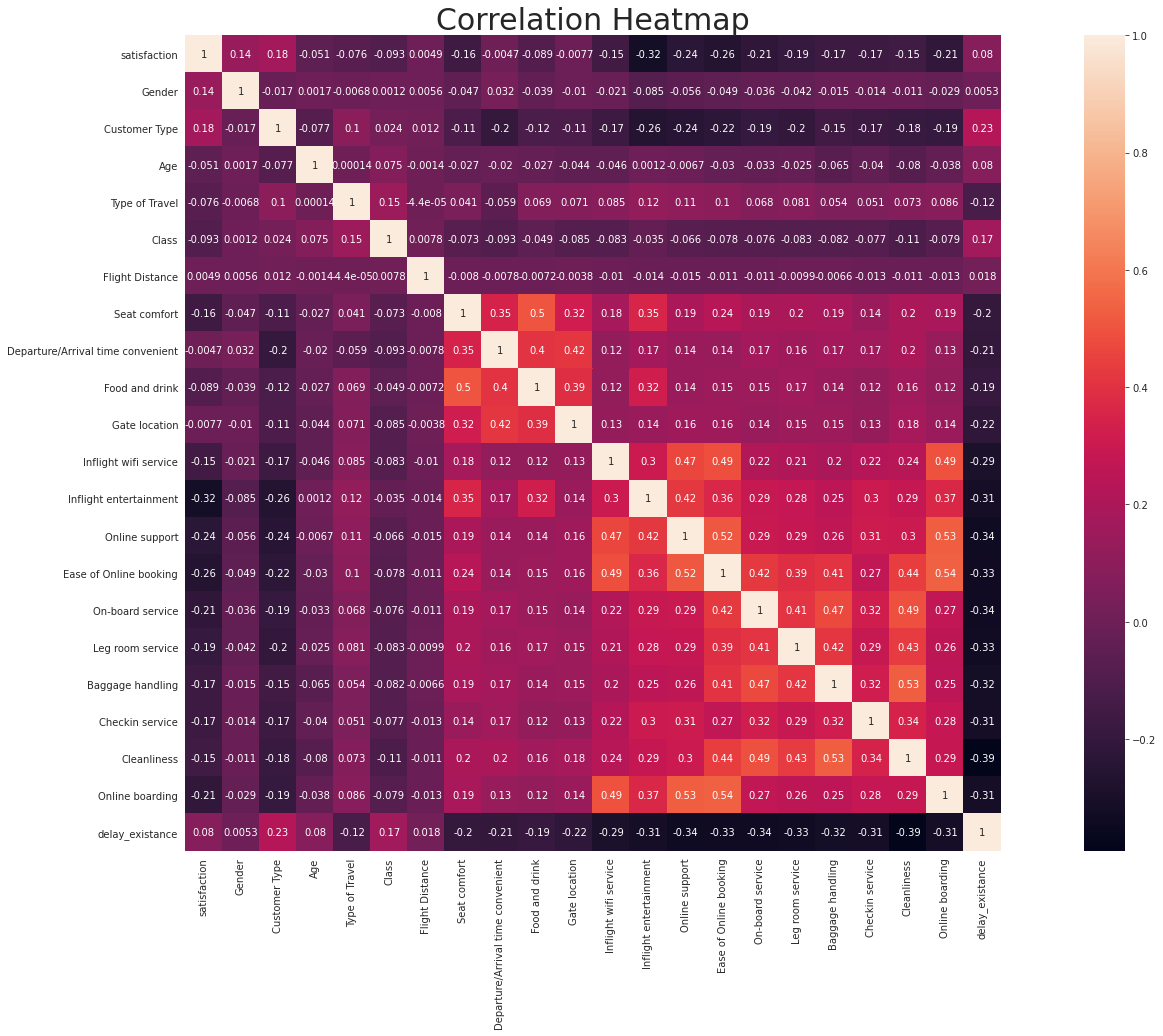

In [8]:
# 3. EDA2
"""
■ 목표1: 상관관계 확인하기

■ 목표2: 만족도 변화 확인하기

■ 목표3: 특성 영향력 확인
▷ 방법: permutation

■ 목표4: 정보 누수 확인
"""
# 3-1. 상관관계 확인하기
# 3-1-1. ordinal 전환하기
from category_encoders import OrdinalEncoder

enc_ordinal = OrdinalEncoder()
enc_ordinal.fit(df_new)

df_new_encoded = enc_ordinal.transform(df_new)

all_cols = df_new.columns
df_new_encoded = pd.DataFrame(df_new_encoded)
df_new_encoded.columns = all_cols


# 3-1-2. 상관관계 확인
corr = df_new_encoded.corr()

mask = np.zeros_like(corr) # 0으로 모두 처리
# mask[np.triu_indices_from(mask)] = True  # 상위 흰색으로 처리
with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (30,15))
    ax = sns.heatmap(corr, mask = mask, square=True, annot=True)

plt.title('Correlation Heatmap', fontsize = 30)



### Heatmap
- (결과 개요) 만족 또는 불만족을 결정하는 특성은 티켓, 기내 서비스와 관련된 것 같습니다.
- (결과-1) 대략적으로 봤을 때, 만족도와 크게 연관될 것(corr > 0.2)으로 예상되는 특성은 11개 정도가 있습니다. 기내 엔터테인먼트(0.32), 온라인 예약 만족도(0.26), 온라인 서비스(0.24) 순으로 연관성이 높은 것으로 나타났습니다.
- (결과-2)지연이 길어질수록 만족도는 크게 감소하지 않는 것으로 보입니다.


### 3-2. 만족도 변화 확인하기
- 성별로 만족도 차이가 발생하는지 확인합니다.
- 충성고객의 여부 따라 만족 여부가 달라지는지 확인합니다.
- 회원 등급에 따라 만족도 차이가 발생하는지 확인합니다.

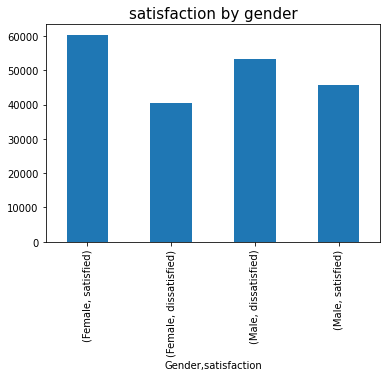

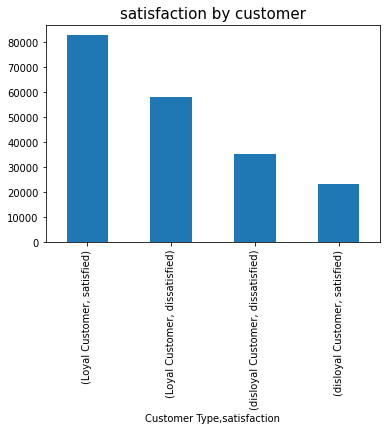

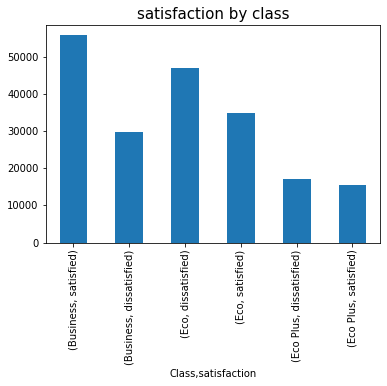

In [9]:
# 3-2. 만족도 변화 확인하기
# 3-2-1. 성별
df_new.groupby('Gender')['satisfaction'].value_counts().plot(kind = 'bar')
plt.title('satisfaction by gender', fontsize = 15);
plt.show()


# 3-2-2. Customer
df_new.groupby('Customer Type')['satisfaction'].value_counts().plot.bar()
plt.title('satisfaction by customer', fontsize = 15);
plt.show()


# 3-2-3. Class
df_new.groupby('Class')['satisfaction'].value_counts().plot.bar()
plt.title('satisfaction by class', fontsize = 15);
plt.show()


## 만족도 변화 결과
- (성별) 여성과 남성의 만족도 비율 차이는 거의 없습니다.
- (충성도) 충성도가 높은 고객이 만족 비율이 더 높습니다. 차별화된 서비스를 제공할 것으로 예상됩니다.
- (회원등급) 비즈니스 승객이 꽤 있습니다. Eco Plus 비율이 낮은 것은 회원의 수(=표본의 수)가 작아서 그럴 것 같습니다. 

In [10]:
# 3-3. 특성 영향력 확인
## permutation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import eli5
from eli5.sklearn import PermutationImportance

# 3-3-1. 데이터 구분하기
## train/test
df_temp_train, df_test = train_test_split(df_new_encoded, train_size = 0.7, random_state = 37)
df_train, df_val = train_test_split(df_temp_train, train_size = 0.7, random_state = 35)

## feature/target
target = 'satisfaction'

X_train = df_train.drop(columns = target)
y_train = df_train[target]

X_val = df_val.drop(columns = target)
y_val = df_val[target]

X_test = df_test.drop(columns = target)
y_test = df_test[target]

## 학습하기
model_rf = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
model_rf.fit(X_train, y_train)

## 특성 중요도(permutation)
permuter = PermutationImportance(model_rf, # model
                                 scoring='accuracy', # metric
                                 n_iter=5, # 다른 random seed를 사용하여 5번 반복
                                 random_state=2
                                 )

## 검증세트를 이용해 중요도 계산하기
# X_val_transformed = model_rf.transform(X_val)

## 변환하기
permuter.fit(X_val, y_val)

## 결과1
feature_names = X_val.columns.tolist()
# pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending = False)

## 결과2
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0762 ± 0.0019,Seat comfort
0.0376 ± 0.0005,Customer Type
0.0347 ± 0.0021,Inflight entertainment
0.0165 ± 0.0007,Gender
0.0165 ± 0.0012,Type of Travel
0.0106 ± 0.0004,Checkin service
0.0104 ± 0.0031,Online support
0.0080 ± 0.0014,Online boarding
0.0073 ± 0.0022,Baggage handling
0.0073 ± 0.0019,Cleanliness


### 특성 영향력 확인 결과
- (개요) 영향력 조사를 실시했습니다. 전체 특성에 대하여 permutation Importance(순열 중요도)를 이용했으며, 그 결과는 위와 같습니다.
- (요약) 가장 중요도가 높은 것은 좌석 만족도(0.0733)입니다. 그 뒤로 고객의 충성도(0.0341), 기내 오락(0.0337)이 영향력이 높습니다.
- (의견) 3000mile 이내의 운항 시 6시간 정도 비행을 한다고 가정하면, 꽤 중요하게 생각할 것 같습니다.
- (의견) 충성 고객을 많이 만들면 만족도를 높일 수 있는 여지가 높습니다. 항공사에 우호적인 승객으로 만드는 차별화된 서비스에 대한 고민이 필요합니다.
- (요약) heatmap에서와 같이 지연이 만족 여부에 주는 영향력은 그 크기도 작고, 음의 관계를 갖습니다.


### 3-3. 특성 영향력 확인(비교)

In [11]:
# 3-3. 특성 영향력 확인(비교)
from sklearn.feature_selection import f_regression, SelectKBest

selector = SelectKBest(f_regression, k='all')

selector.fit(X_train, y_train)

selector_mask = selector.get_support()
selected_cols = X_train.columns[selector_mask]

model_rf_kbest = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)
model_rf_kbest.fit(X_train, y_train)
y_val_pred_kbest = model_rf_kbest.predict(X_val)

coef = pd.Series(model_rf_kbest.feature_importances_, selected_cols).sort_values(ascending = False)
coef

Inflight entertainment               0.134482
Seat comfort                         0.096992
Ease of Online booking               0.065399
Online support                       0.059509
Leg room service                     0.053100
On-board service                     0.052845
Food and drink                       0.044931
Age                                  0.043639
Cleanliness                          0.043144
Online boarding                      0.042916
Checkin service                      0.042768
Departure/Arrival time convenient    0.042164
Baggage handling                     0.039744
Gate location                        0.038832
Inflight wifi service                0.037662
Customer Type                        0.031921
Class                                0.030613
Flight Distance                      0.029441
Gender                               0.026626
Type of Travel                       0.024787
delay_existance                      0.018484
dtype: float64

### 특성 영향력 비교(permutation vs SelectKBest) 결과
- (공통점) seat comfort, Inflight entertainment 특성 등은 모두 상위에 위치합니다.
- (차이점) SelectKBest의 영향력이 보유한 숫자의 크기가 전반적으로 큽니다.
- (의견) permutation을 돌려보되, 의심스러운 부분이 있으면 SelectKBest를 검증용으로 사용해도 될 것 같습니다.


### 3-4. 정보 누수 확인
- 모델의 정확도를 확인하고, 정보 누수 를 검사합니다.

              precision    recall  f1-score   support

           1       0.81      0.79      0.80     22262
           2       0.77      0.79      0.78     19656

    accuracy                           0.79     41918
   macro avg       0.79      0.79      0.79     41918
weighted avg       0.79      0.79      0.79     41918



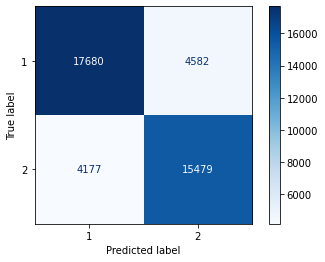

In [12]:
# 3-4. 정보 누수 확인
from sklearn.metrics import plot_confusion_matrix, classification_report

y_val_pred = model_rf.predict(X_val)

## report 
print(classification_report(y_val, y_val_pred))

## matrix plot
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model_rf, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);

### 정보 누수 확인
- (결과) 분류 정확도가 준수한 것으로 보아 정보의 누수가 발생하지 않은 것 같습니다.
- (기준모델 비교) 기준모델에 비해 분류 정확도가 높습니다.


## 4. 모델 제작
- xgboost를 사용해서 모델을 제작해봅니다.
- CatBoost를 사용하여 모델을 제작하고, xgboost와 비교해봅니다.
- RandomForest를 활용하여 모델을 제작하고, 위 2가지 모델과 비교합니다.

### 4-1. xgboost를 활용한 모델 제작
- xgboost를 활용하여 모델을 제작합니다.
- 이미 제작된 모델과 성능을 비교합니다.

              precision    recall  f1-score   support

           1       0.81      0.79      0.80     22262
           2       0.77      0.79      0.78     19656

    accuracy                           0.79     41918
   macro avg       0.79      0.79      0.79     41918
weighted avg       0.79      0.79      0.79     41918



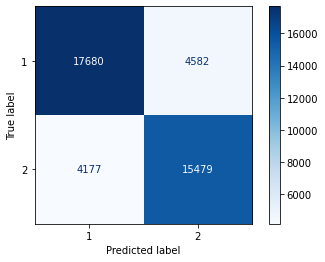

In [13]:
# 4. 모델 제작
"""
■ 목표1: xgboost를 활용한 모델 제작

■ 목표2: CatBoost를 활용한 모델 제작 및 비교

"""
# 4-1. xgboost를 활용한 모델 제작
from xgboost import XGBClassifier

model_xgb = XGBClassifier(n_estimators=200
                        , random_state=2
                        , n_jobs=-1
                        , max_depth=7
                        , learning_rate=0.2
                        )


model_xgb.fit(X_train, y_train)

y_val_pred_xgb = model_xgb.predict(X_val)

## report 
print(classification_report(y_val, y_val_pred_xgb))

## matrix plot
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model_rf, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);


### xgboost를 활용한 모델 제작 결과
- (결과 비교) 랜덤 포레스트 결과 대비 정확도, recall, precision이 크게 다르지 않습니다. 
- (의견) 하이퍼파라메터를 조정해서 더욱 높일 수 있는지 확인이 필요합니다.
- (실험) CatBoost를 사용해본 후 타 모델과 비교해보겠습니다.

### 4-2. Catboost 활용 모델 제작
- Catboost 활용하여 모델을 제작합니다.
- 이미 제작된 모델과 성능을 비교합니다.

In [14]:
# # 4-2. Catboost 활용 모델 제작 및 결과
# from catboost import CatBoostClassifier

# model_cat = CatBoostClassifier(early_stopping_rounds = 1)

# model_cat.fit(X_train, y_train)

# y_val_pred_cat = model_cat.predict(X_val)

# ## report 
# print(classification_report(y_val, y_val_pred_cat))

# ## matrix plot
# fig, ax = plt.subplots()
# pcm = plot_confusion_matrix(model_rf, X_val, y_val,
#                             cmap=plt.cm.Blues,
#                             ax=ax);

# """
#               precision    recall  f1-score   support

#            1       0.82      0.79      0.80     22197
#            2       0.77      0.80      0.79     19721

#     accuracy                           0.80     41918
#    macro avg       0.80      0.80      0.80     41918
# weighted avg       0.80      0.80      0.80     41918
# """                            

### 다른 라이브러리 활용 예측 및 비교
- (결과 비교) 랜덤 포레스트, 부스트 종류 분류기(=모델) 모두 동일한 정확도를 보유하고 있습니다.
- (차이점) 타 모델과 다른점이 있다면 learn 이라는 용어와 숫자가 함께 나온다는 점 입니다.
- (learn1) learn이라는 수치는 모델이 실제값에 대한 예측력을 높이기 위한 가중치입니다.
- (learn2) 모델 초기에는 오류가 많기에 배워야 할 가중치가 크고, 예측을 할수록 가중치가 작아지는 것을 확인할 수 있습니다.
- (과적합 주의) 주의해야 할 점은 가중치가 작아질수록 과적합이 발생할 확률은 증가한다는 것 입니다.
- (과적합 예상) 실제로 후반부에는 가중치가 작고, 변화가 적은데, 이는 과적합이 이루어지고 있다는 증거로 볼 수 있습니다.
- (과적합 방지) 과적합이 이루어지지 않기 위해서는 learn 수치의 변화가 없을 때 예측을 중단해야 합니다.

## 5. 모델 최적화 및 선택
- RandomizedSearchCV를 활용해 3개의 모델을 최적화 범위를 결정합니다.
- 검증 세트 예측 결과가 우수한 모델을 최종적으로 선택합니다.

### 5-1. RandomForest 모델 최적화
- RandomizedSearchCV를 활용해 RandomForest 모델을 최적화하고 성능을 확인합니다.

Fitting 10 folds for each of 10 candidates, totalling 100 fits
best hyper: {'class_weight': 'balanced', 'max_depth': 78, 'max_features': 0.7134211315102772, 'n_estimators': 45}
best score(accuracy): 0.7926712697230911
index: 55, threshold: 0.4222222222222222
              precision    recall  f1-score   support

           0       0.91      0.68      0.78     22262
           1       0.72      0.92      0.81     19656

    accuracy                           0.79     41918
   macro avg       0.81      0.80      0.79     41918
weighted avg       0.82      0.79      0.79     41918

auc_score: 0.9099927167458162


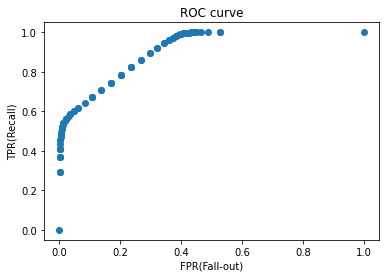

In [15]:
# 5. 모델 최적화
"""
■ 목표1: RandomizedSearchCV를 활용한 Random Forest모델 최적화

■ 목표2: RandomizedSearchCV를 활용한 gradient boost(XGBoost)모델 최적화

■ 목표2: RandomizedSearchCV를 활용한 gradient boost(Catboost)모델 최적화

"""
# 5-1. random forest 모델 최적화
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

model_rf = RandomForestClassifier(random_state = 31)

## 하이퍼파라메터 조작 범위 설정
dists = {'n_estimators': randint(10, 50),            # week learner 개수
         'max_depth': range(5, 100),     # 최대 깊이(깊어지면 과적합)
         'max_features': uniform(0, 1),               # 다양한 트리 생성 목적
         'class_weight': ['balanced', None]
         }


RanSear = RandomizedSearchCV(model_rf,
                             cv = 10, # default
                             verbose = 1,  # more information
                             scoring = 'accuracy',  # criteria for selection,
                             param_distributions = dists,
                             n_jobs = -1,
                             refit = True)

RanSear.fit(X_train, y_train)

## 최적의 하이퍼파라메터
print(f'best hyper: {RanSear.best_params_}')

## accuracy
print(f'best score(accuracy): {RanSear.best_score_}')

## 다양한 조합 및 결과
RanSear_result_table = pd.DataFrame(RanSear.cv_results_).sort_values(by = ['rank_test_score']) # score 기준 내림차순

## 최적 모델 불러오기
model_rf_opt = RanSear.best_estimator_


## threshold 조정하기
def practice_rf(X_train, y_train, X_val, y_val, y_pred_prob):

    fpr, tpr, threshold = roc_curve(y_val, y_pred_prob)

    roc_result_table = pd.DataFrame({'FPR' : fpr,
                                 'TPR' : tpr,
                                 'Thres': threshold })

    roc_result_table

    ## roc 그리기
    plt.scatter(fpr, tpr)
    plt.title('ROC curve')
    plt.xlabel('FPR(Fall-out)')
    plt.ylabel('TPR(Recall)');

    ## 최적의 threshold 찾기
    optimal_index = np.argmax(tpr-fpr) # tpr과 fpr의 차이가 최대가 되는 지점이 최적 지점!
    optimal_threshold = threshold[optimal_index]
    print(f'index: {optimal_index}, threshold: {optimal_threshold}')

    
    ## 최적의 threshold 적용 후 report
    y_pred_opt = y_pred_prob >= optimal_threshold # 최적의 임계값보다 큰 확률을 1(true)이라고 하고, 작은 것을 0(false)라고 한다.
    print(classification_report(y_val, y_pred_opt))
    
    ## auc 점수 확인
    from sklearn.metrics import roc_auc_score
    auc_score = roc_auc_score(y_val, y_pred_prob)  # 최적화 전 결과를 대입하여 곡선 아래 면적 계산
    print(f'auc_score: {auc_score}')

    return optimal_threshold

## 검증 모델 예측하기
y_val_pred_rf_opt = model_rf_opt.predict(X_val)
y_val_pred_prob = model_rf_opt.predict_proba(X_val)[:,1]

optimal_threshold = practice_rf(X_train, y_train, X_val, y_val - 1, y_val_pred_prob)

### RandomForest 최적화 결과
- (하이퍼파라메터) 과적합을 피하고, 결과 도출시간을 고려해 3가지만 우선 입력하였습니다. 입력한 파라메터는 n_estimators, max_features, max_depth 입니다.
- (최적 모델) 최고 accuracy는 0.9508이며, 이 때의 하이퍼파라메터 값은 각각 n_estimators: 18, max_features: 12, max_depth: 15 입니다.
- (검증 데이터 예측 결과) accuracy는 0.95이며, precision 및 recall 또한 0.94 이상으로 높은 성능을 보여주고 있습니다.
- (permute 특성 선택 반영) 영향력이 0.01 이상인 특성을 선택하여 예측한 결과 정확도가 0.94로 하락하여 모든 특성을 선택함.


### 5-2. XGBboost 모델 최적화
- RandomizedSearchCV를 활용해 XGBboost 모델을 최적화하고 성능을 확인합니다.

In [16]:
# # 5-2. XGBboost 최적화

# model_xgb = XGBClassifier(random_state=32)

# ## 하이퍼파라메터 조작 범위 설정
# dists = {'n_estimators': randint(10, 50),            # week learner 개수
#          'max_depth': range(5, 100),                  # 최대 깊이(깊어지면 과적합)
#          'max_features': uniform(0, 1),              # 다양한 트리 생성 목적
#          'class_weight': ['balanced', None],
#          'learning_rate': np.arange(0.001, 0.2, 0.0001)
#          }

# RanSear_xgb = RandomizedSearchCV(model_xgb,
#                                  cv = 10, # default
#                                  verbose = 1,  # more information
#                                  scoring = 'accuracy',  # criteria for selection
#                                  param_distributions = dists,
#                                  n_jobs = -1,
#                                  refit = True)

# RanSear_xgb.fit(X_train, y_train)

# ## 최적의 하이퍼파라메터
# print(f'best hyper: {RanSear_xgb.best_params_}')
# print(f'best score(accuracy): {RanSear_xgb.best_score_}')

# ## 다양한 조합 및 결과
# RanSear_xgb_result_table = pd.DataFrame(RanSear_xgb.cv_results_).sort_values(by = ['rank_test_score']) # score 기준 내림차순

# ## 최적 모델 불러오기
# model_xgb_opt = RanSear_xgb.best_estimator_

# ## threshold 조정하기
# def practice_xgb(X_train, y_train, X_val, y_val, y_pred_prob):

#     fpr, tpr, threshold = roc_curve(y_val, y_pred_prob)

#     roc_result_table = pd.DataFrame({'FPR' : fpr,
#                                  'TPR' : tpr,
#                                  'Thres': threshold })

#     roc_result_table


#     ## roc 그리기
#     plt.scatter(fpr, tpr)
#     plt.title('ROC curve')
#     plt.xlabel('FPR(Fall-out)')
#     plt.ylabel('TPR(Recall)');

#     ## 최적의 threshold 찾기
#     optimal_index = np.argmax(tpr-fpr) # tpr과 fpr의 차이가 최대가 되는 지점이 최적 지점!
#     optimal_threshold = threshold[optimal_index]
#     print(f'index: {optimal_index}, threshold: {optimal_threshold}')

#     ## 최적의 threshold 적용 후 report
#     y_pred_opt = y_pred_prob >= optimal_threshold # 최적의 임계값보다 큰 확률을 1(true)이라고 하고, 작은 것을 0(false)라고 한다.
#     print(classification_report(y_val, y_pred_opt))
    
#     ## auc 점수 확인
#     from sklearn.metrics import roc_auc_score
#     auc_score = roc_auc_score(y_val, y_pred_prob)  # 최적화 전 결과를 대입하여 곡선 아래 면적 계산
#     print(f'auc_score: {auc_score}')

# ## 검증 모델 예측하기
# y_val_pred_xgb_opt = model_xgb_opt.predict(X_val)
# y_val_pred_prob_xgb = model_xgb_opt.predict_proba(X_val)[:,1]

# practice_xgb(X_train, y_train, X_val, y_val - 1, y_val_pred_prob_xgb) # 0과 1만 가능

### XGBboost 모델 최적화 결과
- RandomizedSearchCV를 활용해 XGBboost 모델을 최적화하고 성능을 확인합니다.
- (하이퍼파라메터) random forest와 동일하게, 과적합을 피하고 결과 도출시간을 고려해 동일한 파라메터 3가지만 입력하였습니다. 입력한 파라메터는 n_estimators, max_features, max_depth 입니다.
- (결과) 최고 accuracy는 0.9486이며, 이 때의 하이퍼파라메터 값은 각각 n_estimators: 19, 'max_features: 17, max_depth: 12 입니다.
- (검증 데이터 예측 결과) accuracy는 0.95이며, precision 및 recall 또한 0.94 이상으로 높은 성능을 보여주고 있습니다.

### 5-3. Catboost 모델 최적화
- RandomizedSearchCV를 활용해 Catboost 모델을 최적화하고 성능을 확인합니다.

In [17]:
# # 5-3. Catboost 모델 최적화

# model_cat = CatBoostClassifier(random_state=33)

# ## 하이퍼파라메터 조작 범위 설정
# dists = {'n_estimators': randint(10, 50),            # week learner 개수
#          'max_depth': range(5, 15),     # 최대 깊이(깊어지면 과적합)
#          'learning_rate': np.arange(0.001, 0.2, 0.0001)
#          }

# RanSear_cat = RandomizedSearchCV(model_cat,
#                                  cv = 10, # default
#                                  verbose = 1,  # more information
#                                  scoring = 'accuracy',  # criteria for selection
#                                  param_distributions = dists,
#                                  n_jobs = -1,
#                                  refit = True)

# RanSear_cat.fit(X_train, y_train)


# ## 최적의 하이퍼파라메터
# print(f'best hyper: {RanSear_cat.best_params_}')
# print(f'best score(accuracy): {RanSear_cat.best_score_}')

# ## 다양한 조합 및 결과
# RanSear_cat_result_table = pd.DataFrame(RanSear_cat.cv_results_).sort_values(by = ['rank_test_score']) # score 기준 내림차순

# ## 최적 모델 불러오기
# model_cat_opt = RanSear_cat.best_estimator_


# ## threshold 조정하기
# def practice_cat(X_train, y_train, X_val, y_val, y_pred_prob):

#     fpr, tpr, threshold = roc_curve(y_val, y_pred_prob)

#     roc_result_table = pd.DataFrame({'FPR' : fpr,
#                                  'TPR' : tpr,
#                                  'Thres': threshold })

#     roc_result_table


#     ## roc 그리기
#     plt.scatter(fpr, tpr)
#     plt.title('ROC curve')
#     plt.xlabel('FPR(Fall-out)')
#     plt.ylabel('TPR(Recall)');

#     ## 최적의 threshold 찾기
#     optimal_index = np.argmax(tpr-fpr) # tpr과 fpr의 차이가 최대가 되는 지점이 최적 지점!
#     optimal_threshold = threshold[optimal_index]
#     print(f'index: {optimal_index}, threshold: {optimal_threshold}')

    
#     ## 최적의 threshold 적용 후 report
#     y_pred_opt = y_pred_prob >= optimal_threshold # 최적의 임계값보다 큰 확률을 1(true)이라고 하고, 작은 것을 0(false)라고 한다.
#     print(classification_report(y_val, y_pred_opt))
    
#     ## auc 점수 확인
#     from sklearn.metrics import roc_auc_score
#     auc_score = roc_auc_score(y_val, y_pred_prob)  # 최적화 전 결과를 대입하여 곡선 아래 면적 계산
#     print(f'auc_score: {auc_score}')


# ## 검증 모델 예측하기
# y_val_pred_cat_opt = model_cat_opt.predict(X_val)
# y_val_pred_prob_cat = model_cat_opt.predict_proba(X_val)[:,1]

# practice_cat(X_train, y_train, X_val, y_val - 1, y_val_pred_prob_cat) # 0과 1만 가능

### RandomSearchCV를 활용한 모델 최적화 결과
- (결과) 정확도 결과는 비등합니다. 우열을 가린다면, AUC 결과가 우수한 random forest 모델이 탁월한 구분 성능을 보유하고 있습니다.
- (결과-정확도) 정확도는 0.79로 기준모델 대비 40% 증가하였습니다.
- (결과-정밀도,재현율) 정밀도(precision)와 재현율(recall)은 편차가 큽니다. 본 모델은 에 대한 예측률이 더 좋습니다.
- (목표 부합 여부) 본 모델은 본 프로젝트 분석에 적합한 모델입니다. 
- (부합 근거) 프로젝트 목표를 달성하기 위해서 0에 대한 정밀도가 높고, 1에 대한 재현율이 높은 모델이 필요합니다. 본 프로젝트의 목표는 만족(0)하는 승객 증대 방안 적용 전후 비교 결과를 도출하는 것입니다. 그러므로, 실제 만족한 승객을 만족했다고 정확하게 분류할 수 있는 모델 또는 실제 불만족한 승객을 불만족했다고 구분할 수 있는 모델이 필요합니다. 결과 수치상 만족도 예측에 한하여 1에 가까운 수치를 보유하므로 본 모델은 본 프로젝트에 적합합니다. 
- (의견) 사실 검증 세트 예측 결과가 동일하므로 사실상 어느것을 선택해도 비슷한 양질의 예측이 가능할 것으로 예상됩니다.
 

## 6. 테스트셋 결과 도출
- 최종 선정된 모델을 활용하여 테스트세트의 결과를 도출합니다.
- 미개선 상황과 개선 후 상황을 비교합니다.

### 6-1. 테스트셋 예측하기
- 최종 선정된 모델을 사용하여 테스트셋 예측을 수행합니다.
- 만족도 하락에 가장 큰 영향력을 제공한 TOP3 특성을 선정합니다. 

index: 67, threshold: 0.3368897632862348
              precision    recall  f1-score   support

           0       0.96      0.63      0.76     31895
           1       0.70      0.97      0.81     27988

    accuracy                           0.79     59883
   macro avg       0.83      0.80      0.79     59883
weighted avg       0.84      0.79      0.79     59883

auc_score: 0.910858121892788
percentage_satisfied: 52.56750663794399%


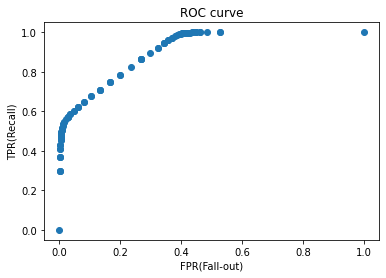

In [18]:
# 6. 테스트셋 결과 도출
"""
■ 목표1: 테스트세트 결과를 도출

■ 목표2: 미개선 상황과 개선 후 상황 비교
"""

# 6-1. 테스트셋 예측하기

## 최종 모델(RandomForest)
y_test_pred_final_rf = model_rf_opt.predict(X_test)
y_test_pred_prob_final_rf = model_rf_opt.predict_proba(X_test)[:,1]

## threshold 조정하기
def adjust_threshold(y_true, y_pred_prob):

    fpr, tpr, threshold = roc_curve(y_true, y_pred_prob)

    roc_result_table = pd.DataFrame({'FPR' : fpr,
                                     'TPR' : tpr,
                                     'Thres': threshold })

    roc_result_table

    ## roc 그리기
    plt.scatter(fpr, tpr)
    plt.title('ROC curve')
    plt.xlabel('FPR(Fall-out)')
    plt.ylabel('TPR(Recall)');

    ## 최적의 threshold 찾기
    optimal_index = np.argmax(tpr-fpr) # tpr과 fpr의 차이가 최대가 되는 지점이 최적 지점!
    optimal_threshold = threshold[optimal_index]
    print(f'index: {optimal_index}, threshold: {optimal_threshold}')
    # optimal_threshold = 0.9
    
    ## 최적의 threshold 적용 후 report
    y_pred_opt = y_pred_prob >= optimal_threshold # 최적의 임계값보다 큰 확률을 1(true)이라고 하고, 작은 것을 0(false)라고 한다.
    print(classification_report(y_true, y_pred_opt))
    
    ## auc 점수 확인
    from sklearn.metrics import roc_auc_score
    auc_score = roc_auc_score(y_true, y_pred_prob)  # 최적화 전 결과를 대입하여 곡선 아래 면적 계산
    print(f'auc_score: {auc_score}')


adjust_threshold(y_test - 1, y_test_pred_prob_final_rf) # 0과 1만 가능

## 만족도 비율
def cal_percentage_satisfied(y_pred):
    
    cutoff_dissatisfied = y_pred == 2
    cutoff_satisfied = y_pred == 1

    percentage_satisfied = len(y_pred[cutoff_satisfied]) / len(y_pred) * 100
    
    print(f'percentage_satisfied: {percentage_satisfied}%')
    
    return percentage_satisfied

percentage_satisfied_sc0 = cal_percentage_satisfied(y_test_pred_final_rf)

### 테스트셋 예측하기 결과
- (개요) 최종 선정된 random forest 모델을 이용하여 테스트셋을 예측하였습니다.
- (결과) 정확도는 0.79이며, 검증 때와 다를 바 없습니다.
- (의견) 예측 때마다 최적의 threshold를 적용하겠습니다. threshold 조정은 예측 때마다 해야하는지 확실하지는 않지만, 조정을 해야한다고 판단하고 있습니다. model instance 내에서 조정하는 것이 아니기 때문입니다.


### 6-2. 영향력 TOP3 특성 확인하기
- shap을 활용하여 불만족 결정에 가장 큰 영향을 주는 특성 TOP3를 확인합니다.

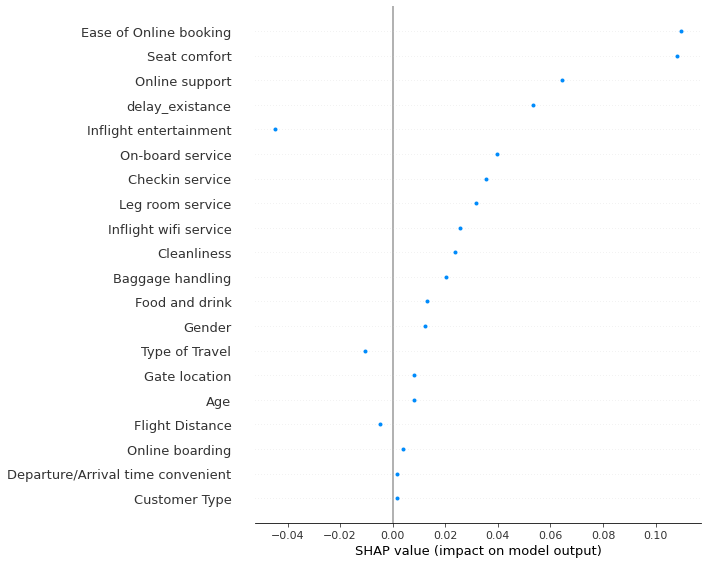

'\n■ Permutation feature importance vs. SHAP\n\n Permutation feature importance 모델 성능의 감소에 기반을 두지만 SHAP은 특성 기여도의 크기에 기반을 둔다.\n'

In [19]:
# 6-2. 영향력 TOP3 특성 확인하기
import shap
import random

pd.options.display.float_format = '{:.3f}'.format

X_test_prob_1_table = pd.DataFrame(model_rf_opt.predict_proba(X_test)[:,1])
X_test_prob_1_table.columns = ['prob_1'] # dissatisfied
X_test_prob_1_table_index = X_test_prob_1_table.reset_index()

# 객체 지정하기
explainer = shap.TreeExplainer(model_rf_opt)

## 불만족 선택 확률과 X_test 합치기(확률 증가 → 불만족 선택 확률 증가) 
X_test_index = X_test.reset_index(drop = True)
X_test_with_prob_1 = pd.concat([X_test_prob_1_table_index, X_test_index], axis = 1).drop(columns = 'index') # index 번호 새로고침 해야 합쳐짐 가능

## 내림차순으로 정렬(확률 기준)
X_test_with_prob_1.sort_values(by = 'prob_1', axis = 0)

## 1차 타겟 추리기(dissatisfied percentage: 0.8 ~ 1.0)
cutoff_target_1_lowerbound = X_test_with_prob_1['prob_1'] > 0.8
cutoff_target_1_upperbound = X_test_with_prob_1['prob_1'] <= 1
X_test_with_prob_1_t1 = X_test_with_prob_1[(cutoff_target_1_lowerbound) & (cutoff_target_1_upperbound)].sort_values(by='prob_1', axis = 0, ascending = False).drop(columns = 'prob_1')
X_test_with_prob_1_t1 # 14613 rows

# ## 2차 타겟 추리기(0.5~0.8)


# ## 3차 타겟 추리기(0.3939~0.5)
# cutoff_target_3_lowerbound = X_test_with_prob_1['prob_0'] > optimal_threshold
# cutoff_target_3_upperbound = X_test_with_prob_1['prob_0'] <= 0.5
# X_test_with_prob_1_t3 = X_test_with_prob_1[(cutoff_target_3_lowerbound) & (cutoff_target_3_upperbound)].sort_values(by='prob_0', axis = 0)
# X_test_with_prob_1_t3.describe()


## 랜덤 번호 생성
total_number = pd.DataFrame(np.arange(0,len(X_test_with_prob_1_t1)))
randomly_picked_number = total_number.sample(1, replace = False) ## 전체 크기의 30%: 4367 
random_number = randomly_picked_number[0].to_list() 

## SHAP value 계산하기
explainer = shap.TreeExplainer(model_rf_opt)
row = X_test_with_prob_1_t1.iloc[random_number]
row_processed = row.values
shap_values = explainer.shap_values(row_processed)

## 자바스크립트 초기화
# shap.initjs()

## 그래프 제작
# shap.force_plot(
#     base_value=explainer.expected_value[1],  # 0: satisfied 확률 / 1: unsatisfied 확률 산출
#     shap_values=shap_values[1], # 0: satisfied 확률 / 1: unsatisfied 확률 산출(base value와 동일해야 함)
#     features=X_val_block
#     )

## 그래프 제작
shap.summary_plot(shap_values[1], feature_names = X_test.columns.tolist(), plot_type='dot')

"""
■ Permutation feature importance vs. SHAP

 Permutation feature importance 모델 성능의 감소에 기반을 두지만 SHAP은 특성 기여도의 크기에 기반을 둔다.
"""

### 영향력 TOP3 특성 확인 결과
- (결과) 승객의 불만족 사유 중 가장 큰 영향을 미치는 상위 3개 특성은 기내 엔터테인먼트 만족도, 기내 좌석 편안함, 온라인 예약 난이도입니다.
- (활용) 본 특성의 개선 여부에 따라 2년 후 3개 특성에 대한 만족도가 증가 또는 감소한다고 할 때, 어떠한 결과가 도출되는지 확인해볼 것입니다. 

### 6-3. 시나리오 예측하기 및 결과 비교
- 개선 정도에 따른 변화된 설문 조사지를 제작합니다.
- 선정된 모델을 사용하여 세 시나리오를 예측하고 만족도 변화를 비교합니다.

In [20]:
# 6-3. 시나리오 예측하기 및 결과 비교
"""
■ 특성 영향력(높은 순)
▷ 1위: 기내 엔터테인먼트(Inflight Entertainment)
▷ 2위: 기내 좌석 편안함(Seat Comport)
▷ 3위: 온라인 예약 난이도(Ease of online booking)

■ 시나리오(2022년)
▷ 시나리오 구분
       구분            시나리오0        시나리오1         시나리오2         시나리오3
--------------------------------------------------------------------------------------------
기내 엔터테인먼트         개선 X          개선 O             개선 O            개선 O                 
기내 좌석 편안함          개선 X          개선 X             개선 O            개선 O                
온라인 예약 난이도        개선 X          개선 X             개선 X            개선 O

▷ 가정 사항
 ㅇ 개선: 2022년 설문 조사 시 1점 상승 가정
 ㅇ 미개선: 2022년 설문 조사 시 1점 하락 가정

▷ 필독
 ㅇ 내용: 불만족할수록 점수 낮아짐
 ㅇ 근거: corr(heatmap 참고)

"""


# 6-3-1. 설문 조사지 제작
# 6-3-1-1. 시나리오1, entertainment + 1 / Seat comfort - 1 / Ease of Online booking - 1
X_test_sc_1_temp = X_test.reset_index(drop = True)

## 함수(개선용/+1)
def improving_case(df, feature_name):

    df_temp = df # 임시 변수 선언. df로 수행한 후 출력하면 X_test 자체가 변형되는 불상사가 발생함. 다음 시나리오에 영향을 미쳐 왜곡된 결과를 도출하는 원인이 됨
    length = len(df_temp[feature_name])

    for i in range(length):
        if df_temp[feature_name][i] == df_temp[feature_name].max():
            df_temp[feature_name][i] = df_temp[feature_name][i]
        else: 
            df_temp[feature_name][i] = df_temp[feature_name][i] + 1
    
    return df_temp

## 함수(미개선용/-1)
def not_improving_case(df, feature_name):

    df_temp = df # 임시 변수 선언. df로 수행한 후 출력하면 X_test 자체가 변형되는 불상사가 발생함. 다음 시나리오에 영향을 미쳐 왜곡된 결과를 도출하는 원인이 됨
    length = len(df_temp[feature_name])

    for i in range(length):
        if df_temp[feature_name][i] == 0:
            df_temp[feature_name][i] = df_temp[feature_name][i]
        else: 
            df_temp[feature_name][i] = df_temp[feature_name][i] - 1.5 
    
    return df_temp

X_test_sc_1_IE = improving_case(X_test_sc_1_temp, 'Inflight entertainment')
X_test_sc_1_SC = not_improving_case(X_test_sc_1_IE, 'Seat comfort')
X_test_sc_1_OB = not_improving_case(X_test_sc_1_SC, 'Ease of Online booking')
X_test_sc_1 = X_test_sc_1_OB


# 6-3-1-2. 시나리오2, entertainment + 1 /  Seat comfort + 1 / Ease of Online booking + 1
X_test_sc_2_temp = X_test.reset_index(drop = True)
X_test_sc_2_IE = improving_case(X_test_sc_2_temp, 'Inflight entertainment')
X_test_sc_2_SC = improving_case(X_test_sc_2_IE, 'Seat comfort')
X_test_sc_2_OB = not_improving_case(X_test_sc_2_SC, 'Ease of Online booking')
X_test_sc_2 = X_test_sc_2_OB


# 6-3-1-3. 시나리오3, entertainment - 1 /  Seat comfort - 1 / Ease of Online booking - 1
X_test_sc_3_temp = X_test.reset_index(drop = True)
X_test_sc_3_IE = improving_case(X_test_sc_3_temp, 'Inflight entertainment')
X_test_sc_3_SC = improving_case(X_test_sc_3_IE, 'Seat comfort')
X_test_sc_3_OB = improving_case(X_test_sc_3_SC, 'Ease of Online booking')
X_test_sc_3 = X_test_sc_3_OB


# 6-3-1-4. 시나리오4(nothing), entertainment + 1 /  Seat comfort + 1 / Ease of Online booking + 1
X_test_sc_4_temp = X_test.reset_index(drop = True)
X_test_sc_4_IE = not_improving_case(X_test_sc_4_temp, 'Inflight entertainment')
X_test_sc_4_SC = not_improving_case(X_test_sc_4_IE, 'Seat comfort')
X_test_sc_4_OB = not_improving_case(X_test_sc_4_SC, 'Ease of Online booking')
X_test_sc_4 = X_test_sc_4_OB



# 6-3-2. 예측 및 만족도 결과 도출

# 6-3-2-1. 예측
## threshold 조정 함수
def adjust_threshold(y_pred_prob, optimal_threshold):

    ## 최적의 threshold 선언
    optimal_threshold = optimal_threshold

    ## 최적의 threshold 적용 후 report
    y_pred_opt = y_pred_prob <= optimal_threshold # 최적의 임계값보다 큰 확률을 1(true)이라고 하고, 작은 것을 0(false)라고 한다.
    
    return y_pred_opt

## 시나리오1
y_test_pred_sc1 = model_rf_opt.predict(X_test_sc_1)
y_test_pred_prob_sc1 = model_rf_opt.predict_proba(X_test_sc_1)[:,1] # dissatisfied 확률 선언

y_test_pred_prob_sc1_opt = adjust_threshold(y_test_pred_prob_sc1, optimal_threshold) ## threshold 조정


## 시나리오2
y_test_pred_sc2 = model_rf_opt.predict(X_test_sc_2)
y_test_pred_prob_sc2 = model_rf_opt.predict_proba(X_test_sc_2)[:,1] # dissatisfied 확률 선언

y_test_pred_prob_sc2_opt = adjust_threshold(y_test_pred_prob_sc2, optimal_threshold) ## threshold 조정


## 시나리오3
y_test_pred_sc3 = model_rf_opt.predict(X_test_sc_3)
y_test_pred_prob_sc3 = model_rf_opt.predict_proba(X_test_sc_3)[:,1] # dissatisfied 확률 선언

y_test_pred_prob_sc3_opt = adjust_threshold(y_test_pred_prob_sc3, optimal_threshold) ## threshold 조정


## 시나리오4
y_test_pred_sc4 = model_rf_opt.predict(X_test_sc_4)
y_test_pred_prob_sc4 = model_rf_opt.predict_proba(X_test_sc_4)[:,1] # dissatisfied 확률 선언

y_test_pred_prob_sc4_opt = adjust_threshold(y_test_pred_prob_sc4, optimal_threshold) ## threshold 조정


# 6-3-2-2. 만족도 결과 도출
## 만족도 산출 함수
def cal_percentage_satisfied_2(y_pred):
    
    cutoff_dissatisfied = y_pred == False
    cutoff_satisfied = y_pred == True

    percentage_satisfied = len(y_pred[cutoff_satisfied]) / len(y_pred) * 100
    
    print(f'percentage_satisfied: {percentage_satisfied}%')
    
    return percentage_satisfied



## 시나리오1
percentage_satisfied_sc1 = cal_percentage_satisfied_2(y_test_pred_prob_sc1_opt)
# print(f'시나리오1: {percentage_satisfied_sc1}')

## 시나리오2
percentage_satisfied_sc2 = cal_percentage_satisfied_2(y_test_pred_prob_sc2_opt)
# print(f'시나리오2: {percentage_satisfied_sc2}')

## 시나리오3
percentage_satisfied_sc3 = cal_percentage_satisfied_2(y_test_pred_prob_sc3_opt)
# print(f'시나리오3: {percentage_satisfied_sc3}')

## 시나리오4
percentage_satisfied_sc4 = cal_percentage_satisfied_2(y_test_pred_prob_sc4_opt)
# print(f'시나리오4: {percentage_satisfied_sc4}')

## 결과
df_results = pd.DataFrame({'now': [percentage_satisfied_sc0],
                           'scenario_0': [percentage_satisfied_sc4],
                           'scenario_1': [percentage_satisfied_sc1],
                           'scenario_2': [percentage_satisfied_sc2],
                           'scenario_3': [percentage_satisfied_sc3]
                           })

df_results

percentage_satisfied: 51.47537698512099%
percentage_satisfied: 55.21767446520715%
percentage_satisfied: 54.142244042549635%
percentage_satisfied: 38.710485446620915%


,now,scenario_0,scenario_1,scenario_2,scenario_3
0,52.568,38.710,51.475,55.218,54.142


In [29]:
X_test_sc_1_temp

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,delay_existance
0,2,1,5,1,2,0,0,4,3,1,3,5,4,0,1,3,1,3,1,4,1
1,1,2,5,2,2,1,0,0,4,4,3,3,3,0,1,2,1,4,1,4,1
2,2,2,2,2,1,1,0,2,2,3,3,4,3,0,1,5,3,4,4,3,1
3,2,1,6,2,1,1,0,1,1,1,3,5,3,0,1,3,3,2,3,3,1
4,1,1,1,1,1,1,0,2,2,2,5,3,5,0,4,4,4,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59878,1,2,1,2,1,1,0,3,3,3,1,5,4,0,5,1,4,5,4,1,0
59879,2,1,4,1,1,1,0,4,3,3,2,5,2,0,2,3,4,2,4,2,0
59880,1,1,7,2,3,1,0,4,3,3,0,5,3,0,2,1,1,3,2,2,1
59881,1,1,3,2,1,1,0,2,2,2,2,4,2,0,3,3,3,2,3,2,1


In [31]:
X_test_sc_1

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,delay_existance
0,2,1,5,1,2,0,0,4,3,1,3,5,4,0,1,3,1,3,1,4,1
1,1,2,5,2,2,1,0,0,4,4,3,3,3,0,1,2,1,4,1,4,1
2,2,2,2,2,1,1,0,2,2,3,3,4,3,0,1,5,3,4,4,3,1
3,2,1,6,2,1,1,0,1,1,1,3,5,3,0,1,3,3,2,3,3,1
4,1,1,1,1,1,1,0,2,2,2,5,3,5,0,4,4,4,2,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59878,1,2,1,2,1,1,0,3,3,3,1,5,4,0,5,1,4,5,4,1,0
59879,2,1,4,1,1,1,0,4,3,3,2,5,2,0,2,3,4,2,4,2,0
59880,1,1,7,2,3,1,0,4,3,3,0,5,3,0,2,1,1,3,2,2,1
59881,1,1,3,2,1,1,0,2,2,2,2,4,2,0,3,3,3,2,3,2,1


### 시나리오 예측하기 및 결과 비교
- (결과-시나리오0) 2022년 개선 사업을 수행하지 않을 경우 만족률은 33.8%로 하락합니다.
- (결과-시나리오1) 기내 엔터테인먼트'만'를 개선할 경우 감소폭이 작아져 46%의 만족률를 기록할 것으로 예상됩니다.
- (결과-시나리오2) 기내 엔터테인먼트와 좌석 개선을 함께 한다면 현재 만족률인 53%를 유지할 수 있을 것으로 보입니다.
- (결과-시나리오3) 기내 엔터테인먼트, 좌석, 온라인 예약 난이도 개선 작업을 동시에 수행하면 현재보다 조금 낮은 52.3%의 만족률을 유지할 것으로 예상됩니다. 

## 7. 변화 예측하기
- 시나리오별 이용객 및 매출액을 산출합니다.
- 산출된 값을 비교합니다.

### 7-1. 시나리오별 이용객 및 매출액 산출
- 시나리오1~시나리오3의 이용객 변화를 계산합니다.
- 시나리오1~시나리오3의 매출액 변화를 계산합니다.

In [23]:
# 7-1. 시나리오별 이용객 및 매출액 산출
"""
■ 가정사항
▷ 만족도 변화에 따른 이용객 및 매출액 변화를 산출하기 위해 다음과 같이 가정합니다.
ㅇ 이용객 및 매출액 변화를 산출 식

구분       단위         기준               개선                      미개선                비고
-------------------------------------------------------------------------------------------------------
이용객     만 명        2,682          기준 * 증감 %p             기준 * 증감 %p         기준 대비
매출액     억 원       110,000    증가인원 * 평균 매출액       감소인원 * 평균 매출액    기준 대비

ㅇ 평균 매출액
 - 평균 매출액 = ∑거리별 차등 가격 / 총 이용객
"""
# 7-1-1. 이용객 산출
## 시나리오별 차이 계산
now = percentage_satisfied_sc0 - percentage_satisfied_sc0
diff_btw_sc00 = percentage_satisfied_sc4 - percentage_satisfied_sc0
diff_btw_sc01 = percentage_satisfied_sc1 - percentage_satisfied_sc0
diff_btw_sc02 = percentage_satisfied_sc2 - percentage_satisfied_sc0
diff_btw_sc03 = percentage_satisfied_sc3 - percentage_satisfied_sc0

df_diff_perc = pd.DataFrame({'now': [now],
                             'scenario_0': [diff_btw_sc00],
                             'scenario_1': [diff_btw_sc01],
                             'scenario_2': [diff_btw_sc02],
                             'scenario_3': [diff_btw_sc03]
                             })

## 시나리오별 이용객 계산
num_of_pax_cri = 2682 # 단위: 만 명
now = num_of_pax_cri * 0.000
num_of_pax_sc0 = num_of_pax_cri * diff_btw_sc00 / 100
num_of_pax_sc1 = num_of_pax_cri * diff_btw_sc01 / 100 
num_of_pax_sc2 = num_of_pax_cri * diff_btw_sc02 / 100 
num_of_pax_sc3 = num_of_pax_cri * diff_btw_sc03 / 100

df_diff_pax = pd.DataFrame({'now': [now],
                            'scenario_0': [num_of_pax_sc0],
                            'scenario_1': [num_of_pax_sc1],
                            'scenario_2': [num_of_pax_sc2],
                            'scenario_3': [num_of_pax_sc3]
                            })

# 7-1-2. 매출액 산출
"""
범주         해당 거리(NM)            매출액(1인당)             비행 구간 예시
-----------------------------------------------------------------------------------------
0          0      ~  1000 미만         \ 300,000          인천(ICN) - 상하이 푸동(PVG)
1          1000   ~  3000              \ 600,000          인천(ICN) - 싱가폴 창이(SIN)
2          3000   ~  5000              \ 1,200,000        인천(ICN) - 프랑스 파리(CDG)
3          5000 이상                   \ 1,500,000        인천(ICN) - 뉴욕(JFK)  

"""

## 새로운 특성 추가
X_test['paid_amount'] = 0
X_test['paid_amount'] = np.where(X_test['Flight Distance'] == 0, 300000,
                        np.where(X_test['Flight Distance'] == 1, 600000,
                        np.where(X_test['Flight Distance'] == 2, 1200000,
                        np.where(X_test['Flight Distance'] == 3, 1500000,  1500000))))

## 1인당 평균 매출액 산출
paid_amount_mean = X_test['paid_amount'].mean() # \762,932.72

## 신규 고객에 대한 매출액 산출
now = 0
paid_amount_new_pax_sc0 = num_of_pax_sc0 * paid_amount_mean / 1000000   # 백만 단위
paid_amount_new_pax_sc1 = num_of_pax_sc1 * paid_amount_mean / 1000000
paid_amount_new_pax_sc2 = num_of_pax_sc2 * paid_amount_mean / 1000000
paid_amount_new_pax_sc3 = num_of_pax_sc3 * paid_amount_mean / 1000000

df_new_take_from_new_pax = pd.DataFrame({'now': [now],
                                         'scenario_0': [paid_amount_new_pax_sc0],
                                         'scenario_1': [paid_amount_new_pax_sc1],
                                         'scenario_2': [paid_amount_new_pax_sc2],
                                         'scenario_3': [paid_amount_new_pax_sc3]
                                         })


### 시나리오별 이용객 및 매출액 산출 결과
- (가정사항) 만족도 증감에 따른 이용객 및 매출액 변화를 가정하였습니다. 만족도와 이용객 및 매출액은 비례 관계입니다. 만족도가 증가하면 이용객 및 매출액은 증가하고, 만족도가 낮아질 경우 이용객 및 매출액은 감소합니다. 자세한 사항은 '7-1. 시나리오별 이용객 및 매출액 산출'의 가정사항에서 확인할 수 있습니다.
- (이용객 변화) 개선 사항이 증가할수록 승객 감소 폭은 작아지는 경향을 보입니다. 개선 사업을 수행하지 않을 경우 감소 폭이 가장 크고, 기내 엔터테인먼트와 기내 좌석을 개선할 경우 현재 승객 수준을 유지할 수 있습니다.
- (매출액 변화) 이용하는 승객 수에 따라 매출액은 변화합니다. 개선 사업 미수행 시 약 4억여 원의 매출이 감소할 것으로 보입니다. 반면, 기내 엔터테인먼트와 기내 좌석을 개선할 경우 6백만 원의 매출이 감소합니다.

### 7-2. 산출값 비교하기
 - 이용객 및 매출액 변화를 비교합니다.
 - 비교 가능한 그래프를 제작합니다.

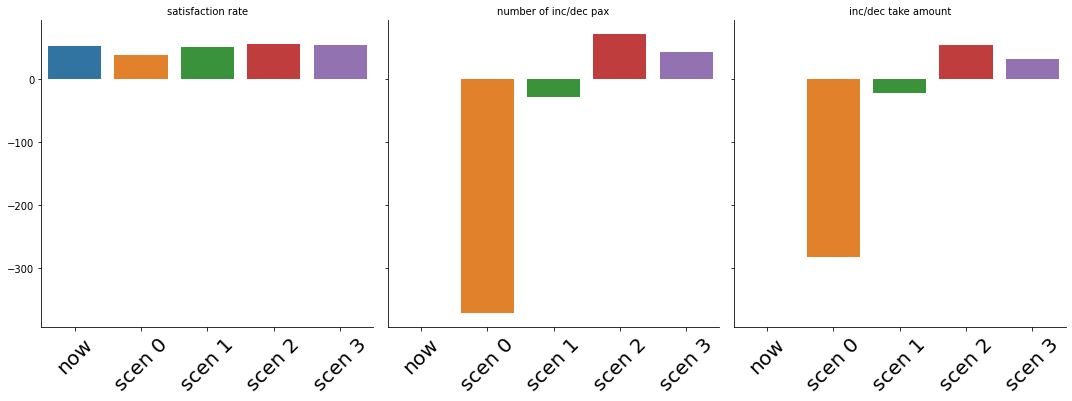

In [24]:
# 7-2. 산출값 비교하기

# 7-2-1. 데이터 결합
result_combined = pd.concat([df_results, df_diff_pax])
result_combined = pd.concat([result_combined, df_new_take_from_new_pax]).reset_index(drop=True)
df_index = pd.DataFrame({'title':['satisfaction rate', 'number of inc/dec pax', 'inc/dec take amount']})

result_combined = pd.concat([df_index, result_combined], axis = 1) 
result_combined


# 7-2-2. 혼합 그래프 제작하기
result_combined_melted = pd.melt(result_combined, id_vars='title', value_vars=['now','scenario_0', 'scenario_1','scenario_2','scenario_3'])
result_combined_melted.columns = ['title', 'scenario', 'value']

g = sns.catplot(x="scenario", y="value", col="title",
                data=result_combined_melted,
                kind="bar");

(g.set_axis_labels("", "")
  .set_xticklabels(['now','scen 0', 'scen 1','scen 2','scen 3'], rotation = 45, fontsize = 20)
  .set_titles("{col_name}")
  .despine(right=True));

In [25]:
## 함수(개선용/+1)
def improving_case(df, feature_name):

    length = len(df[feature_name])

    for i in range(length):
        if df[feature_name][i] == df[feature_name].max():
            df[feature_name][i] = df[feature_name][i]
        else: 
            df[feature_name][i] = df[feature_name][i] + 1
    
    return df

## 함수(미개선용/-1)
def not_improving_case(df, feature_name):

    length = len(df[feature_name])

    for i in range(length):
        if df[feature_name][i] == 0:
            df[feature_name][i] = df[feature_name][i]
        else: 
            df[feature_name][i] = df[feature_name][i] - 1.5 
    
    return df

X_test_IE = improving_case(X_test_sc_1_temp, 'Inflight entertainment')
X_test_SC = not_improving_case(X_test_IE, 'Seat comfort')
X_test_OB = not_improving_case(X_test_SC, 'Ease of Online booking')
X_test_1 = X_test_OB